In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv(r"C:\Users\panda\Downloads\archive (5)\diabetes_prediction_dataset.csv")

In [31]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [19]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [25]:

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

In [26]:
# Find outliers in numeric columns
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
outliers = detect_outliers_iqr(df, numeric_columns)

In [28]:
# Print outliers
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:\n", outlier_data.sum(), "\n")

Outliers in age:
 gender                   0
age                    0.0
hypertension             0
heart_disease            0
smoking_history          0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level      0
diabetes                 0
dtype: object 

Outliers in bmi:
 gender                 FemaleFemaleFemaleFemaleMaleFemaleFemaleFemale...
age                                                            289309.68
hypertension                                                         955
heart_disease                                                        312
smoking_history        formerNo InfoneverneverneverNo InfoneverNo Inf...
bmi                                                            279074.71
HbA1c_level                                                      40402.6
blood_glucose_level                                              1030556
diabetes                                                            1478
dtype: object 

Outliers in HbA1c_level:
 gender

In [29]:
from scipy import stats

# Calculate Z-score
df_numeric = df[numeric_columns].copy()
df_numeric['z_score_age'] = np.abs(stats.zscore(df_numeric['age']))
df_numeric['z_score_bmi'] = np.abs(stats.zscore(df_numeric['bmi']))
df_numeric['z_score_HbA1c'] = np.abs(stats.zscore(df_numeric['HbA1c_level']))
df_numeric['z_score_glucose'] = np.abs(stats.zscore(df_numeric['blood_glucose_level']))

# Get outliers (Z-score > 3)
outliers_z = df_numeric[(df_numeric.iloc[:, -4:] > 3).any(axis=1)]
print("Outliers detected using Z-score:\n", outliers_z)


Outliers detected using Z-score:
         age    bmi  HbA1c_level  blood_glucose_level  z_score_age  \
11     54.0  54.70          6.0                  100     0.538006   
39     34.0  56.43          6.2                  200     0.350222   
40     73.0  25.91          9.0                  160     1.381824   
55     50.0  37.16          9.0                  159     0.360361   
59     67.0  63.48          8.8                  155     1.115355   
...     ...    ...          ...                  ...          ...   
99867  64.0  33.12          5.7                  300     0.982121   
99929  37.0  36.87          8.8                  160     0.216988   
99938  55.0  30.42          6.2                  300     0.582418   
99953  59.0  60.52          3.5                  158     0.760064   
99957  61.0  34.45          6.5                  280     0.848886   

       z_score_bmi  z_score_HbA1c  z_score_glucose  
11        4.125398       0.441307         0.934905  
39        4.386067       0.6281

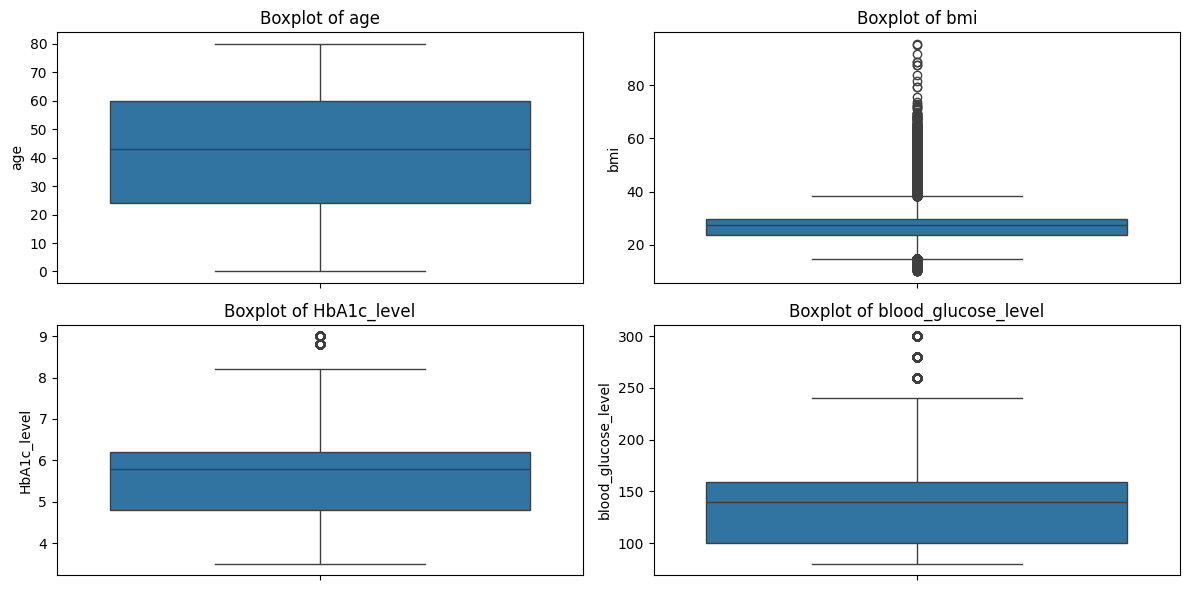

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [33]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [36]:
df["gender"] = df["gender"].map({'Female': 0, 'Male': 1, 'other':2})


In [37]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,never,25.19,6.6,140,0
1,0.0,54.0,0,0,No Info,27.32,6.6,80,0
2,1.0,28.0,0,0,never,27.32,5.7,158,0
3,0.0,36.0,0,0,current,23.45,5.0,155,0
4,1.0,76.0,1,1,current,20.14,4.8,155,0


In [38]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [40]:
df_encoded = pd.get_dummies(df, columns=["smoking_history"], prefix="smoking", dtype=int)


In [41]:
df_encoded.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,0.0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0.0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1.0,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0.0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1.0,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               99982 non-null   float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
 8   smoking_No Info      100000 non-null  int32  
 9   smoking_current      100000 non-null  int32  
 10  smoking_ever         100000 non-null  int32  
 11  smoking_former       100000 non-null  int32  
 12  smoking_never        100000 non-null  int32  
 13  smoking_not current  100000 non-null  int32  
dtypes: float64(4), int32(6), int64(4)
memory usage: 8.4 MB


In [47]:
correlation_matrix = df_encoded.corr()


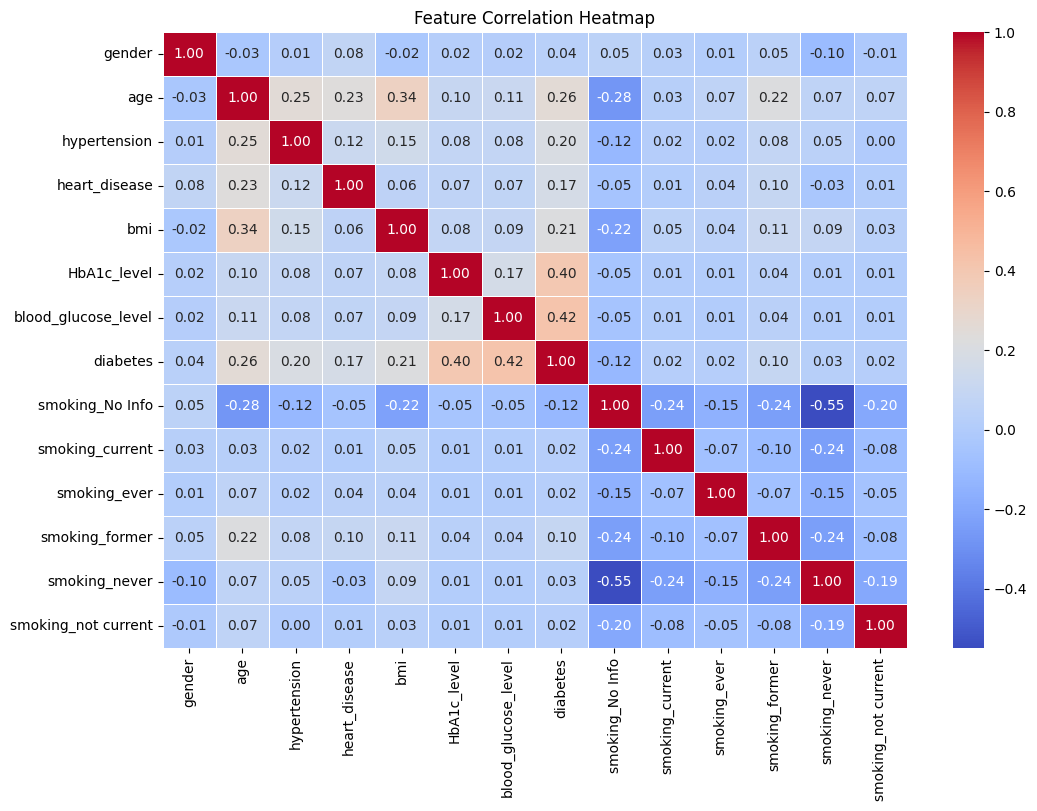

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [66]:
#Selecting features based on correlation
features = ['HbA1c_level', 'blood_glucose_level', 'age', 'hypertension', 'bmi']
target = 'diabetes'

In [67]:
# Splitting data
X = df[features]
y = df[target]

In [68]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Train model
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Predictions
y_pred = model.predict(X_test)

In [72]:
# Accuracy
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


In [76]:
# Taking input from the user
def get_user_input():
    hba1c = float(input("Enter HbA1c Level: "))
    glucose = float(input("Enter Blood Glucose Level: "))
    age = int(input("Enter Age: "))
    hypertension = int(input("Enter Hypertension (1 for Yes, 0 for No): "))
    bmi = float(input("Enter BMI: "))

    input_data = np.array([[hba1c, glucose, age, hypertension, bmi]])
    prediction = model.predict(input_data)
    
    result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"
    print(f"Prediction: {result}")

# Run the function to get user input and make a prediction
get_user_input()

Prediction: Not Diabetic


c:\Users\panda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
